In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential



In [4]:

dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [5]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape


(1259, 1)

In [6]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))


In [7]:

X_train.shape
length = 60
n_features = 1


In [11]:
model = Sequential()
model.add(layers.SimpleRNN(50,input_shape=(length,n_features)))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

print("Name:LATHISH KANNA.M||Register Number: 212222230073        ")
model.summary()

model.fit(X_train1,y_train,epochs=100, batch_size=32)

dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)


Name:LATHISH KANNA.M||Register Number: 212222230073        
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.0168
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 9.4393e-04
Epoch 3/100
38/38 [==============================] - 1s 19ms/step - loss: 7.7594e-04
Epoch 4/100
38/38 [==============================] - 1s 20ms/step - loss: 7.4695e-04
Epoch 5/100
38/38 [=

In [13]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

42/42 [==============================] - 0s 5ms/step
Name:LATHIS KANNA.M||Register Number: 212222230073 


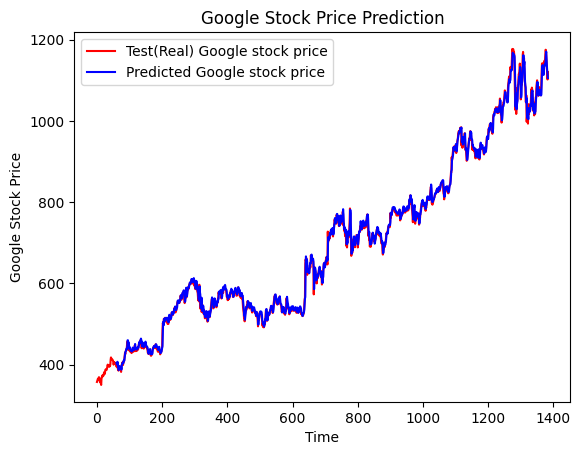

In [14]:
X_test.shape
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

print("Name:LATHIS KANNA.M||Register Number: 212222230073 ")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()